In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
userhome = os.path.expanduser('~')
csvfile = userhome + r'/Desktop/Python/End2EndProjects/Data/Netflix.csv'
df = pd.read_csv(csvfile)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4581 non-null   object 
 1   Open       4581 non-null   float64
 2   High       4581 non-null   float64
 3   Low        4581 non-null   float64
 4   Close      4581 non-null   float64
 5   Adj Close  4581 non-null   float64
 6   Volume     4581 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 250.6+ KB


In [5]:
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,4581,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4.581000e+03
unique,4581,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-12-13,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,78.031471,79.285690,76.736079,78.072056,78.072056,1.760516e+07
std,NaN,118.372084,120.276839,116.376768,118.435303,118.435303,1.971130e+07
min,NaN,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,NaN,3.778571,3.857143,3.685714,3.784286,3.784286,6.908900e+06
50%,NaN,15.392858,15.671429,14.970000,15.324286,15.324286,1.155350e+07
75%,NaN,97.830002,99.529999,96.760002,97.889999,97.889999,2.113440e+07


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [8]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [9]:
df['Date'][0:4581:763].iloc[0]

datetime.date(2002, 5, 23)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febeab6eaf0>,
      dtype=object)

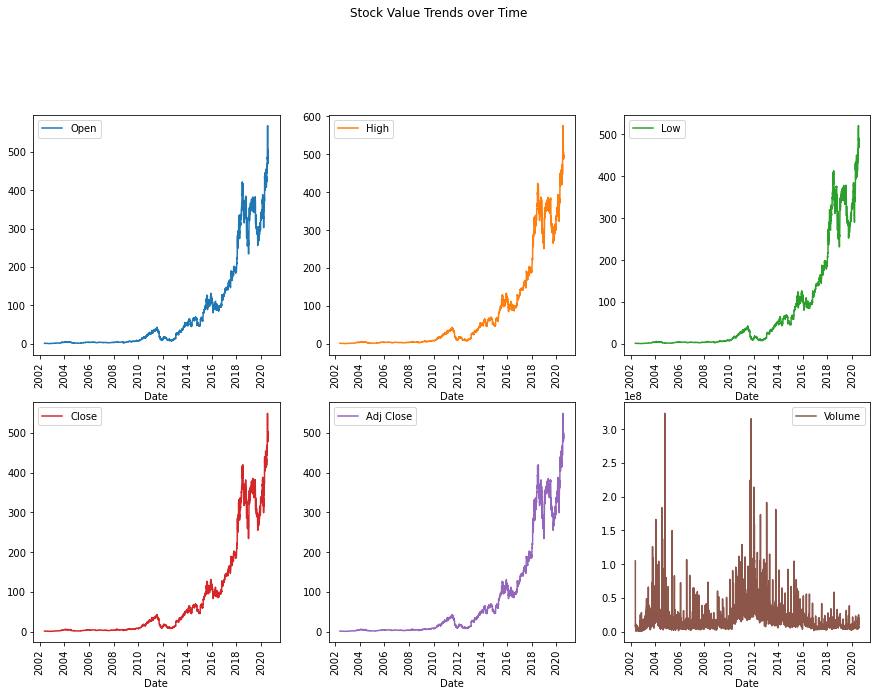

In [10]:
column_list = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df.plot(x = 'Date',y = column_list, subplots = True, layout = (3, 3),
        figsize = (15, 15), sharex = False, title = "Stock Value Trends over Time", rot = 90)

No handles with labels found to put in legend.


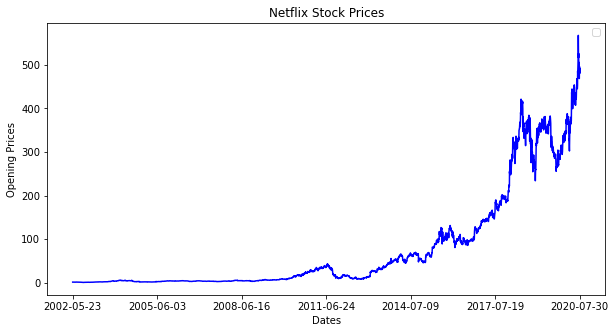

In [11]:
plt.figure(figsize=(10, 5))
plt.title("Netflix Stock Prices")
plt.xlabel("Dates")
plt.ylabel("Opening Prices")
plt.plot(df['Open'], 'blue')
plt.xticks(np.arange(0, 4581, 763), df['Date'][0:4581:763])
plt.legend()

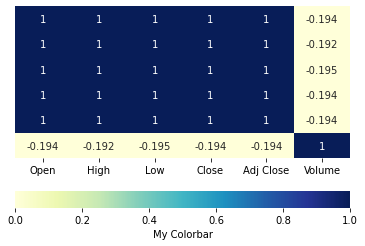

In [12]:
sns.heatmap(df.corr(), vmin=0, vmax=1, cmap='YlGnBu', annot=True, fmt='.3g',yticklabels=False,
            cbar_kws={'label': 'My Colorbar', 'orientation': 'horizontal'})

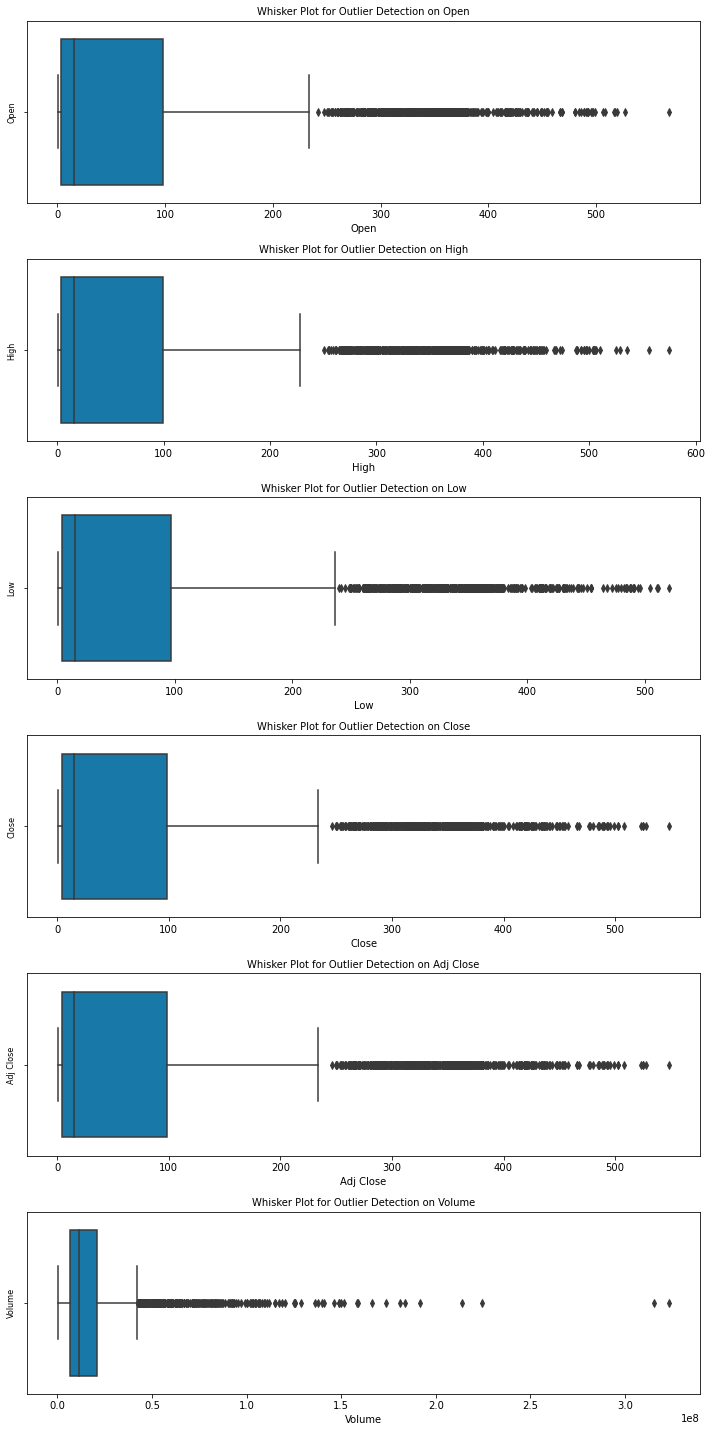

In [13]:
fig, ax = plt.subplots (len(column_list), figsize = (10, 20)) 
for i, col_list in enumerate(column_list):
    sns.boxplot(df[col_list],ax=ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

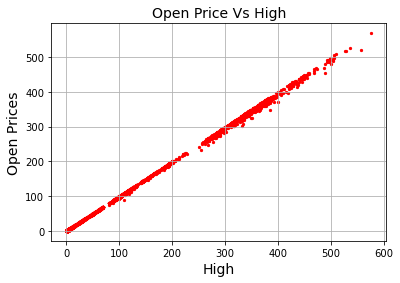

In [14]:
plt.scatter(df['High'], df['Open'], color='red', s=5)
plt.title('Open Price Vs High', fontsize=14)
plt.xlabel('High', fontsize=14)
plt.ylabel('Open Prices', fontsize=14)
plt.grid(True)
plt.show()